In [2]:
import librosa
from pathlib import Path
import numpy as np

In [3]:
def getMfcc(filename):
    y, sr = librosa.load(filename)
    return librosa.feature.mfcc(y=y, sr=sr, n_mfcc=12)

In [4]:
p = Path("/Users/takumi/Downloads/wget/classical-sound.up.seesaa.net/image")
wav_list = sorted(list(p.glob("*.wav")))
wav_list[0]

PosixPath('/Users/takumi/Downloads/wget/classical-sound.up.seesaa.net/image/001-Vivaldi-4Season-Summer-3rd.wav')

In [40]:
df2 = getMfcc(wav_list[1])

In [41]:
df = getMfcc(wav_list[0])

In [54]:
print(df)
print(df.shape)

[[-583.92630814 -583.92630814 -583.92630814 ... -583.92630814
  -583.92630814 -583.92630814]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]]
(12, 8173)


In [5]:
import matplotlib.pyplot as plt
import librosa.display
%matplotlib inline

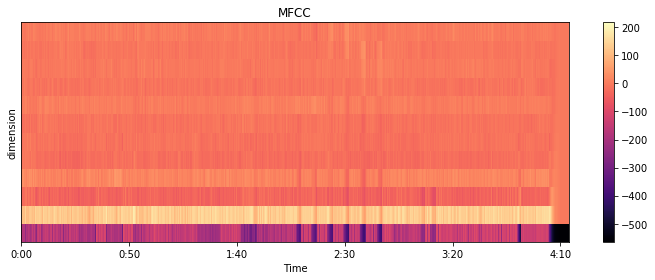

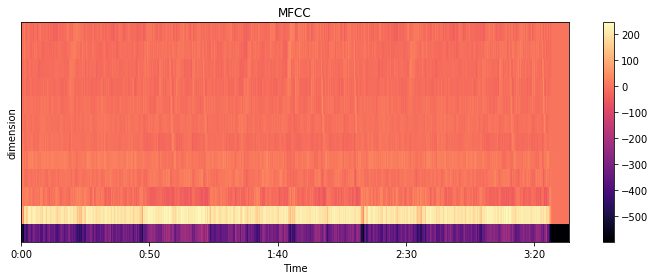

In [67]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(df, x_axis='time',cmap="magma")
plt.ylabel("dimension")
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

plt.figure(figsize=(10, 4))
librosa.display.specshow(df2, x_axis='time',cmap="magma")
plt.ylabel("dimension")
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [8]:
from sklearn.decomposition import PCA

In [84]:
pca = PCA(n_components = 3)
pca.fit(df2)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [89]:
print(pca.components_.shape)

(3, 22098)


In [76]:
print(df2)
print(pca.components_)

[[-564.34299721 -564.34299721 -564.34299721 ... -564.34299721
  -564.34299721 -564.34299721]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]]
[[-0.01226948 -0.01226948 -0.01226948 ... -0.01226948 -0.01226948
  -0.01226948]
 [-0.04042229 -0.04042229 -0.04042229 ... -0.04042229 -0.04042229
  -0.04042229]
 [ 0.00123207  0.00123207  0.00123207 ...  0.00123207  0.00123207
   0.00123207]]


In [6]:
from pathlib import PurePath
filename_list = [PurePath(str(x)).stem for x in wav_list]
print(filename_list)

['001-Vivaldi-4Season-Summer-3rd', '020-Corelli-La-Follia', '041-Chopin-Nocturne-No2', '062-Tchaikovsky-Symphony-No5-1st', '063-Tchaikovsky-Symphony-No5-2nd', '064-Tchaikovsky-Symphony-No6-4th', '065-Tchaikovsky-PianoConcerto-No1-1st-Intro', '066-Tchaikovsky-PianoConcerto-No1-2nd', '067-Tchaikovsky-Andante-Cantabile', '068-Tchaikovsky-1812-Overture', '071-Tchaikovsky-Nutcracker-Trepak', '072-Tchaikovsky-Nutcracker-PasdeDeux-Adage', '073-Tchaikovsky-SwanLake-Seane', '074-Tchaikovsky-SwanLake-Dance-of-4Swans', '075-Tchaikovsky-SleepingBeauty-Waltz', '076-Tchaikovsky-ViolinConcerto-3rd', '174-Mozart-Symphony-No40-1st', '199-Rachmaninov-Piano-Concerto-No2-1st', '216-Wagner-Ride-of-the-Valkyries', 'Albinoni-Adagio', 'Arthur-Pryor-The-Whistler-and-His-Dog', 'Bach-CelloSuite-No1-Prelude', 'Barios-Valse-No3', 'Bartok-Romanian-Folk-Dances-01-Stick-Dance-Strings', 'Bartok-Romanian-Folk-Dances-01-Stick-Dance', 'Beethoven-6-Bagatelles-1-2-3', 'Beethoven-6-Bagatelles-4-5-6', 'Beethoven-Coriolan-Ove

In [53]:
import re
composer_list2 = []
for x in filename_list:
    if re.match(r"[0-9]", x.split("-")[0]):
        composer_list2.append(x.split("-")[1])
    else:
        composer_list2.append(x.split("-")[0])
        
composer_list2.sort()
print(composer_list2)

['Albinoni', 'Arthur', 'Bach', 'Barios', 'Bartok', 'Bartok', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Beethoven', 'Bellini', 'Berlioz', 'Bernhard', 'Bizet', 'Bizet', 'Bizet', 'Bizet', 'Borodin', 'Borodin', 'Borodin', 'Brahms', 'Brahms', 'Brahms', 'Brahms', 'Brahms', 'Brahms', 'Brahms', 'Brahms', 'Brahms', 'Brahms', 'Brahms', 'Brahms', 'Bruckner', 'Bruckner', 'Bruckner', 'Burgmuller', 'Caccini', 'Caccini', 'Chopin', 'Chopin', 'Chopin', 'Chopin', 'Chopin', 'Chopin', 'Chopin', 'Chopin', 'Chopin', 'Chopin', 'Chopin', 'Chopin', 'Chopin', 'Chopin', 'Chopin', 'Chopin', 'Ch

In [71]:
composer_list2[composer_list2.index("ELGAR")] = "Elgar"

In [72]:
composer_list2

['Albinoni',
 'Arthur',
 'Bach',
 'Barios',
 'Bartok',
 'Bartok',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Beethoven',
 'Bellini',
 'Berlioz',
 'Bernhard',
 'Bizet',
 'Bizet',
 'Bizet',
 'Bizet',
 'Borodin',
 'Borodin',
 'Borodin',
 'Brahms',
 'Brahms',
 'Brahms',
 'Brahms',
 'Brahms',
 'Brahms',
 'Brahms',
 'Brahms',
 'Brahms',
 'Brahms',
 'Brahms',
 'Brahms',
 'Bruckner',
 'Bruckner',
 'Bruckner',
 'Burgmuller',
 'Caccini',
 'Caccini',
 'Chopin',
 'Chopin',
 'Chopin',
 'Chopin',
 'Chopin',
 'Chopin',
 'Chopin',
 'Chopin',
 'Cho

In [12]:
from collections import Counter

In [52]:
Counter(composer_list)

Counter({'Albinoni': 1,
         'Arthur': 1,
         'Bach': 1,
         'Barios': 1,
         'Bartok': 2,
         'Beethoven': 37,
         'Bellini': 1,
         'Berlioz': 1,
         'Bernhard': 1,
         'Bizet': 4,
         'Borodin': 3,
         'Brahms': 12,
         'Bruckner': 3,
         'Burgmuller': 1,
         'Caccini': 2,
         'Chopin': 18,
         'Clark': 1,
         'Claude': 1,
         'Corelli': 3,
         'Debussy': 7,
         'Delibes': 1,
         'Dvorak': 7,
         'Elgar': 6,
         'Faure': 2,
         'Franck': 2,
         'GOUNOD': 1,
         'Gershwin': 3,
         'Glinka': 2,
         'Granados': 3,
         'Grieg': 2,
         'Gruber': 1,
         'Hendel': 5,
         'Haydn': 1,
         'Holst': 4,
         'J.F.Wagner': 1,
         'J.S.Bach': 19,
         'J.Strauss': 5,
         'Japanese': 1,
         'Joseph': 1,
         'Korsakov': 1,
         'Lehar': 1,
         'Leoncavallo': 1,
         'Liszt': 9,
         'Mahler': 

In [44]:
from scipy.cluster.vq import whiten, kmeans, vq

In [45]:
# エルボー法を適用したい
def show_dist(mfcc_data):
    # 正規化
    w = whiten(mfcc_data)
    dist_list = []
    for i in range(1,13):
        _, dist = kmeans(w, i)
        dist_list.append(dist)
    plt.plot(range(1, 13), dist_list, marker=".")
    plt.xlabel("Number of clusters")
    plt.ylabel("Values of Distortion")

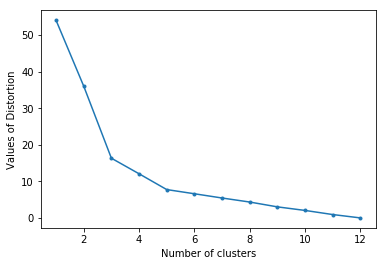

In [46]:
show_dist(df)

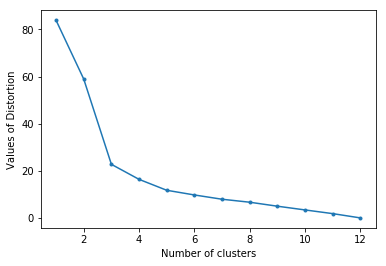

In [47]:
show_dist(df2)

In [56]:
df_w = whiten(df)
codebook, _ = kmeans(df_w, 3)
print(codebook)
code, dist = vq(df_w, codebook)
print(code)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-3.61813613 -3.61813613 -3.61813613 ... -3.61813613 -3.61813613
  -3.61813613]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
[1 0 2 2 2 2 2 2 2 2 2 2]


In [1]:
len(composer_list)

NameError: name 'composer_list' is not defined